In [1]:
# import packages
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pdz
import numpy as np
import pandas as pd

from pandas import Series, DataFrame
from Bio import SeqIO,AlignIO

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.mixture import GaussianMixture as GMM

from sklearn.manifold import TSNE
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import copy

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# methods

### 
### This includes code copied and pasted from the main methods used for the website in BioKlustering-Website/BioKlustering/mlmodel/parser/GMM.py
### These methods are copy-pasted instead of directly included due to difficulties importing Django classes for running locally without running the server
###

def parseFasta(data):
    d = {fasta.id : str(fasta.seq) for fasta in SeqIO.parse(data, "fasta")}
    pd.DataFrame([d])
    s = pd.Series(d, name='Sequence')
    s.index.name = 'ID'
    s.reset_index()
    return pd.DataFrame(s)

def get_kmer_table(path,k_min,k_max):
    genes, gene_len, output_df = read_fasta(path)
    count_vect = CountVectorizer(analyzer='char', ngram_range=(k_min, k_max))
    X = count_vect.fit_transform(genes)
    chars = count_vect.get_feature_names_out()
    kmers = X.toarray()
    kmer_freq = []
    for i in range(len(genes)):
        kmer_freq.append(kmers[i] / gene_len[i])
    input = pd.DataFrame(kmer_freq, columns=chars)
    return input, output_df

def get_gene_sequences(filename):
    genes = []
    for record in SeqIO.parse(filename, "fasta"):
        genes.append(str(record.seq))
    return genes

# genes: a list of gene sequences, which can directly be generated from get_gene_sequences().
def get_gene_len(genes):
    gene_len = []

    for i in range(len(genes)):
        gene_len.append(len(genes[i]))
    return gene_len

#read single fasta file containing all the gene sequences
def read_fasta(path):
    all_genes = []
    all_gene_len = []
    output_df = pd.DataFrame()

    virus = parseFasta(path)
    output_df = pd.concat([output_df, virus])
    virus = virus.drop_duplicates(keep="last")
    genes = list(virus['Sequence'])
    genes_seq = get_gene_sequences(path)
    gene_len = get_gene_len(genes_seq)
    all_genes = all_genes + genes_seq
    all_gene_len = all_gene_len + gene_len
    return all_genes, all_gene_len, output_df

In [4]:
input, output = get_kmer_table('./concatenated.fasta', 5,5)

In [5]:
# following code removes all columns with 0 values
# input = input.loc[:, (input != 0).any(axis=0)]
# input.head(10)

In [6]:
import pandas as pd
true_label = pd.read_csv("./responses-carb.csv")
true_label = true_label["class"]
true_label = true_label.tolist()

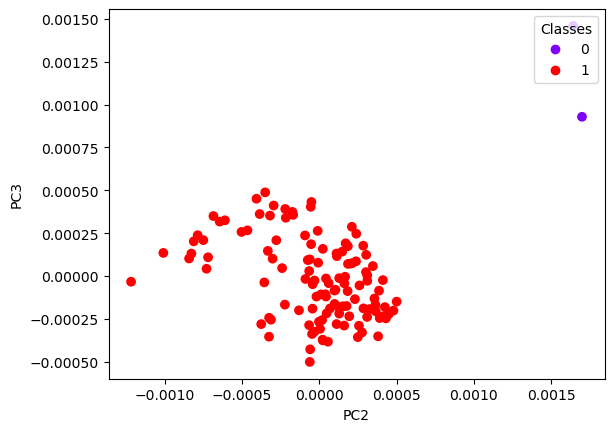

In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3) 
principal_components = pca.fit_transform(input)

# Get the PC1 and PC2 values
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]
pc3 = principal_components[:, 2]

# Manually assign labels based on the PC2 threshold
threshold = 0.0006
new_labels = np.where(pc2 > threshold, 0, 1)

fig, ax = plt.subplots()

scatter_pc = ax.scatter(pc1, pc2, c=new_labels, cmap='rainbow')
ax.legend(*scatter_pc.legend_elements(), loc="upper right", title="Classes")
ax.xaxis.set_label_text('PC2')
ax.yaxis.set_label_text('PC3')

plt.show()

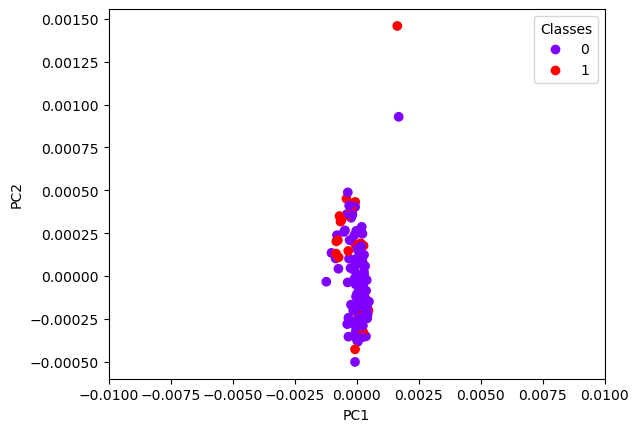

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2) 
principal_components = pca.fit_transform(input)

# Get the PC1 and PC2 values
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

fig, ax = plt.subplots()

scatter_pc = ax.scatter(pc1, pc2, c=true_label, cmap='rainbow')
ax.legend(*scatter_pc.legend_elements(), loc="upper right", title="Classes")
ax.set_xlim(-0.01,0.01)
ax.xaxis.set_label_text('PC1')
ax.yaxis.set_label_text('PC2')

plt.show()

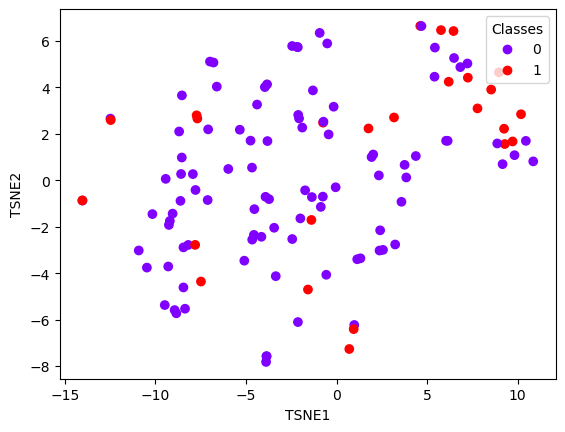

In [9]:
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=3, random_state = 0)
tsne = TSNE(n_components=2, random_state = 0)
tsne_result = tsne.fit_transform(input)
tsne1 = tsne_result[:, 0]
tsne2 = tsne_result[:, 1]
# tsne3 = tsne_result[:, 2]

fig, ax = plt.subplots()

scatter_tsne = ax.scatter(tsne1, tsne2, c=true_label, cmap='rainbow')
ax.legend(*scatter_tsne.legend_elements(), loc="upper right", title="Classes")
ax.xaxis.set_label_text('TSNE1')
ax.yaxis.set_label_text('TSNE2')

plt.show()